In [1]:
import pandas as pd
import datetime
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_excel("ClimateArticles.xlsx")

In [3]:
clinum=[]
for txt in df['Texts']:
    clinum.append(txt.lower().count("climate change"))

In [4]:
df['Count']=clinum

In [6]:
hurrdates=[]
for date in df['Dates']:
    if datetime.fromisoformat('2022-09-28T00:00:00')<=date<=datetime.fromisoformat('2022-09-30T23:59:59'):
        hurrdates.append("Landfall")
    else:
        hurrdates.append("")

In [7]:
df['Hurricane Ian']=hurrdates

In [5]:
monthyear=[]
for d in df['Dates']:
    #monthyear.append(date(d.year,d.month,15))
    if d.month<10:
        monthyear.append(str(d.year)+'-0'+str(d.month))
    else:
        monthyear.append(str(d.year)+'-'+str(d.month))
df['Date']=monthyear

In [6]:
hurrdates=[]
for date in df['Dates']:
    if date.year==2022 and date.month==9:
        hurrdates.append("Landfall")
    else:
        hurrdates.append("")
df['Hurricane Ian']=hurrdates

In [10]:
#hurrdate=datetime.fromisoformat('2022-09-28T12:00:00')

In [7]:
df=df.sort_values(by=['Dates'])

In [12]:
df2=df.loc[df['Count']>2]

In [14]:
df['Date'].value_counts().sort_index()

2021-09    60
2021-10    60
2021-11    61
2021-12    32
2022-01    26
2022-02    36
2022-03    35
2022-04    36
2022-05    34
2022-06    29
2022-07    42
2022-08    58
2022-09    25
2022-10    18
2022-11    20
2022-12    23
2023-01    15
2023-02     9
2023-03    13
2023-04    11
2023-05    17
2023-06    24
2023-07    27
2023-08    24
2023-09    26
Name: Date, dtype: int64

### Number of Articles

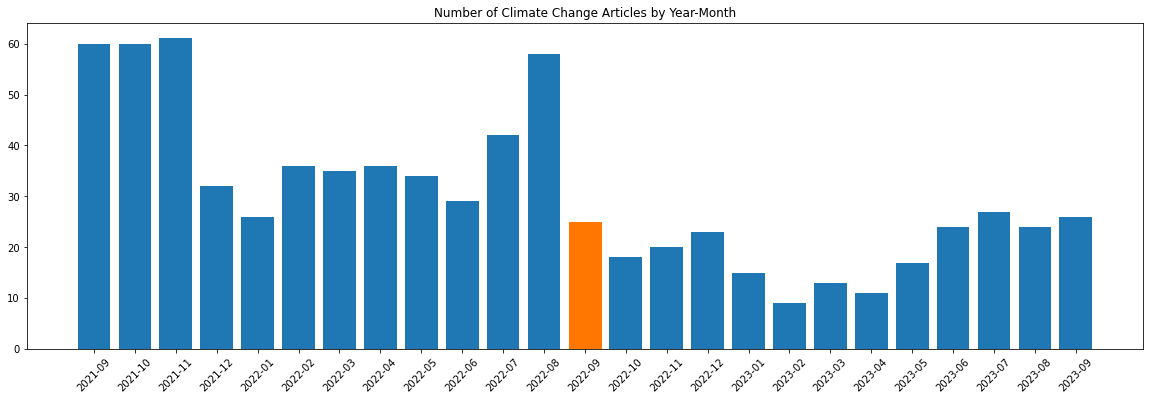

In [97]:
theseries=df['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Climate Change Articles by Year-Month")
plt.show()

In [16]:
localnews=[]
for txt in df['Texts']:
    if 'florida' in txt.lower():
        localnews.append('Local')
    else:
        localnews.append('Other')
df['Local to Florida']=localnews

<AxesSubplot:xlabel='Date'>

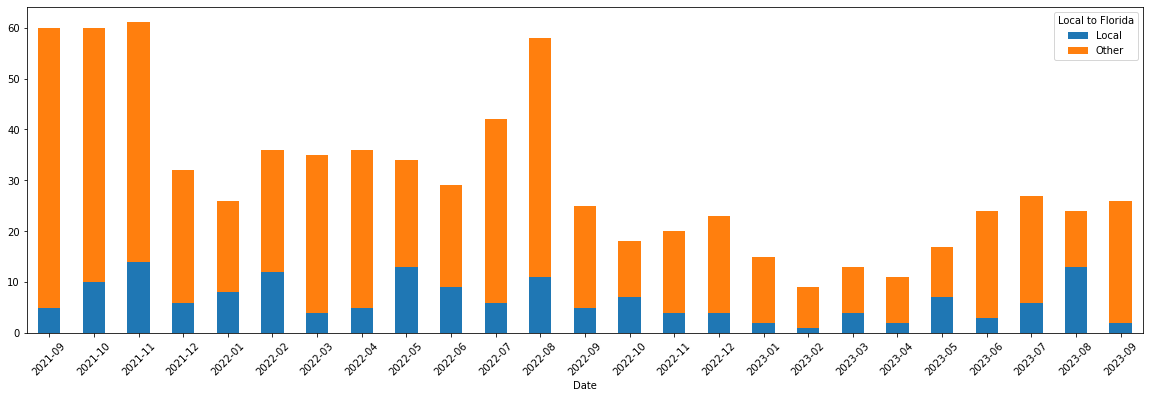

In [25]:
pd.crosstab(index = df['Date'],
           columns = df['Local to Florida'],
           normalize = False,
           margins = False).plot(kind = 'bar', stacked=True,figsize = (20, 6), rot=45)

In [29]:
localdf=df[df["Local to Florida"]=="Local"]
nonlocaldf=df[df["Local to Florida"]=="Other"]

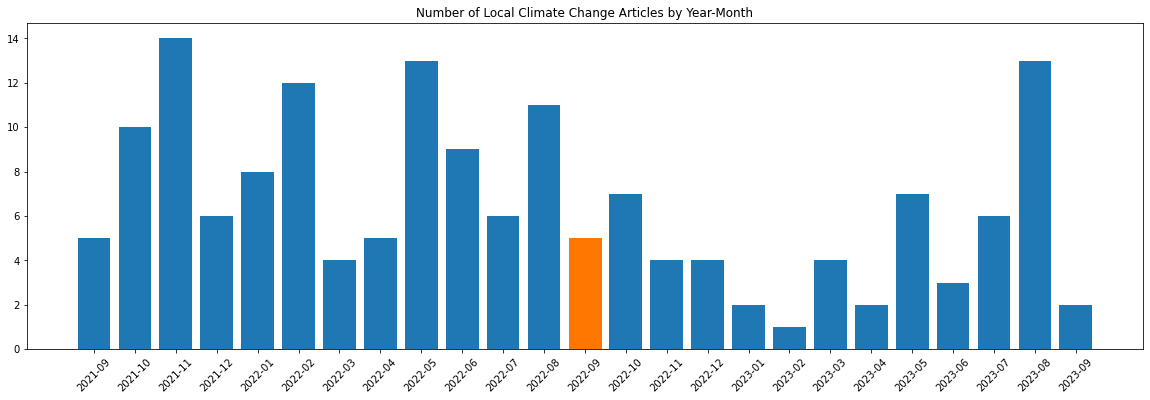

In [30]:
theseries=localdf['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Local Climate Change Articles by Year-Month")
plt.show()

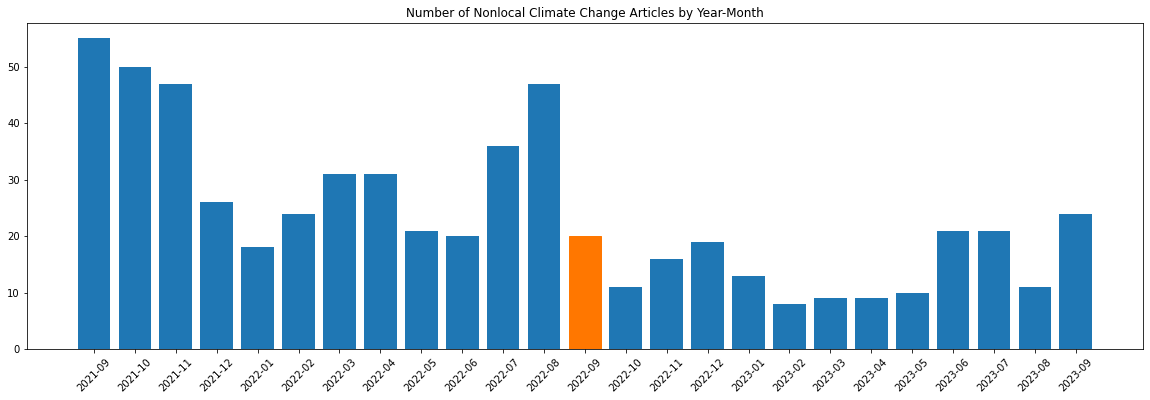

In [32]:
theseries=nonlocaldf['Date'].value_counts().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Number of Nonlocal Climate Change Articles by Year-Month")
plt.show()

### Average Climate Change Mentions

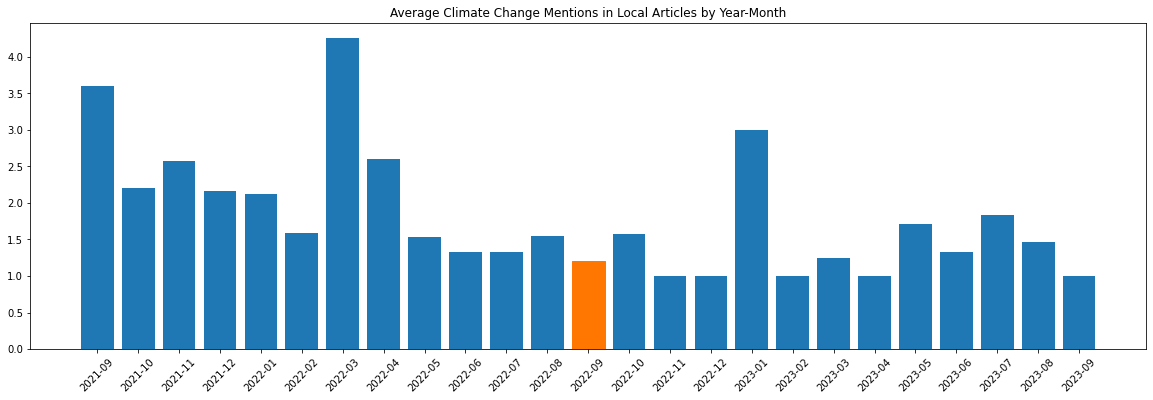

In [27]:
theseries=localdf.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Local Articles by Year-Month")
plt.show()

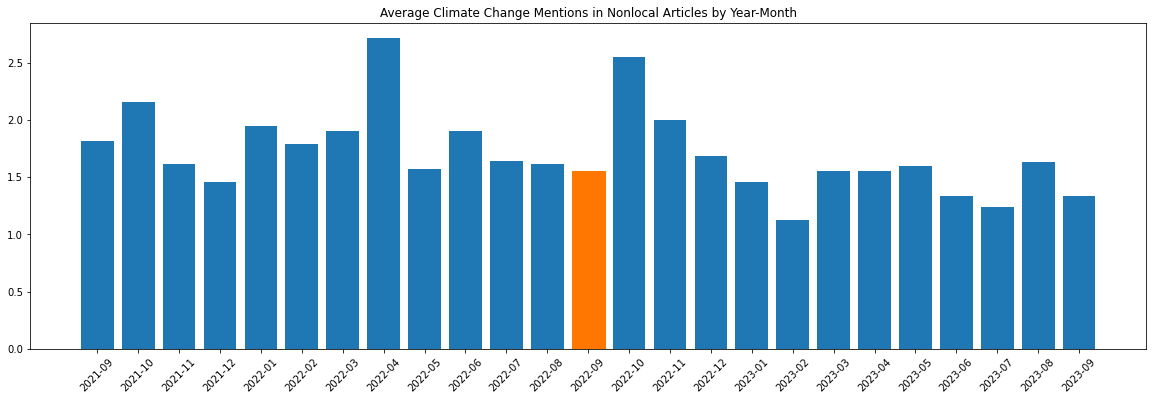

In [28]:
theseries=nonlocaldf.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Nonlocal Articles by Year-Month")
plt.show()

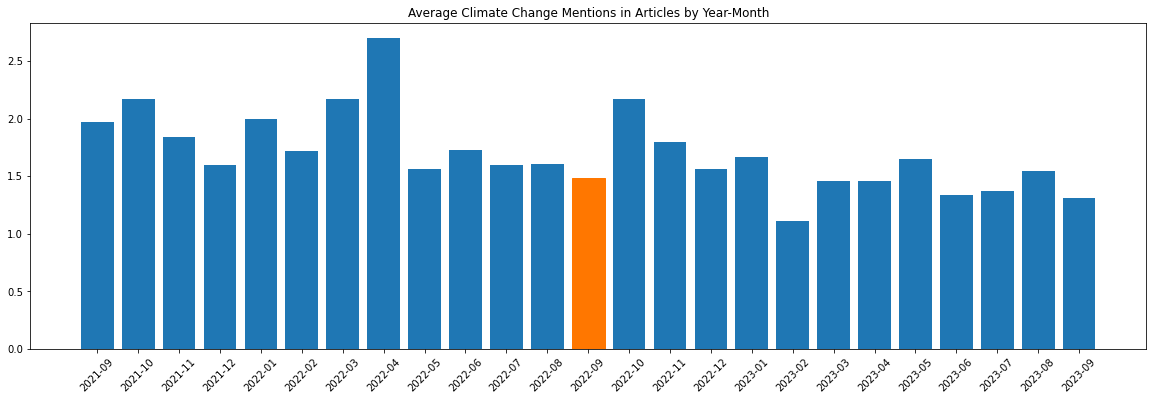

In [16]:
theseries=df.groupby('Date')['Count'].mean().sort_index()
plt.figure(figsize=(20,6))
barlist=plt.bar(theseries.index, theseries.values)
barlist[12].set_color('#FF7700')
plt.xticks(rotation=45)
plt.title("Average Climate Change Mentions in Articles by Year-Month")
plt.show()

/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hilaryolesen/opt/anac

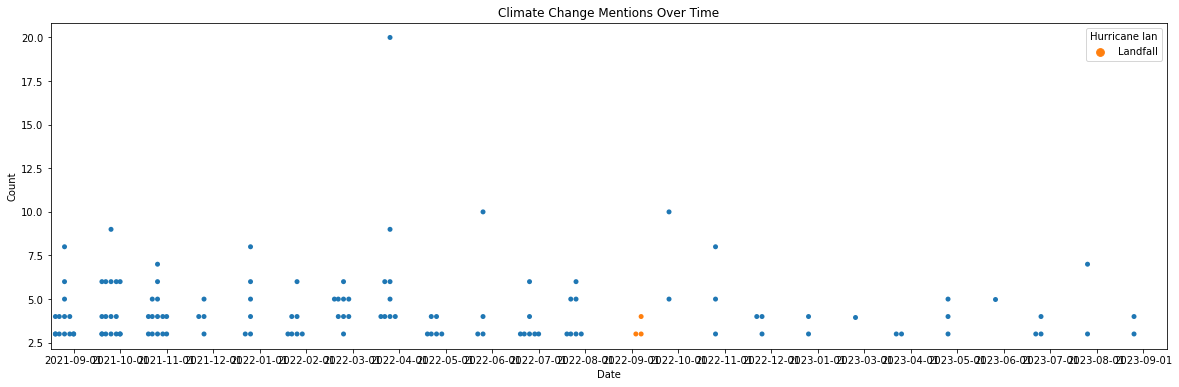

In [35]:
plt.figure(figsize=(20,6))
sns.swarmplot(data=df2, x="Date", y="Count",hue="Hurricane Ian",dodge=True).set(title='Climate Change Mentions Over Time')
#plt.axvline(x=hurrdate)
plt.show()